# DIABETES PREDICTION AND ANALYSIS

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### LOADING THE DATA INTO DATAFRAME FROM CSV

In [2]:
df = pd.read_csv('diabetes_prediction_dataset.csv')
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [48]:
# checking for na values
df.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [49]:
# checking the shape of the dataframe
df.shape

(100000, 9)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


Two object dtype feature columns, gender and smoking history

# <b>EXPLORATORY DATA ANALYSIS</b>
#### GENERAL EDA OBSERVATIONS USING DESCRIBE

In [22]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


#### INFERENCE
* Highest blood glucose level is 300 and lowest is 80 and the average is 138
* Maximum age amongst the patients is 80 while lowest is 0.08 which is approx age of 1 month, meaning this dataset contains data from<br>
a wide variety of age groups
* Highest HbA1c level is 9 while lowest is 3.5 with an average of 5.52
* Highest bmi is 95.6 while lowest is 10.01 with an average of 27.3

# <b>GRAPHICAL EDA QUESTIONS</b>

#### <i> 1. Is there any relationship between blood glucose and diabetes ? If so, visualize using a graph </i>

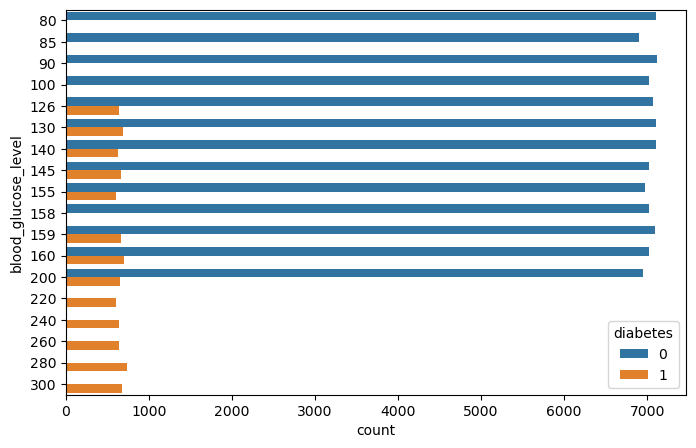

In [39]:
plt.figure(figsize=(8,5))
sns.countplot(y = 'blood_glucose_level', data = df, hue='diabetes')
plt.show()

#### INFERENCE
* Most patients have blood glucose level less than or equal to 200
* Every patient with a glucose level higher than 200 is diabetic
* Diabetes can also occur in patients who have close to normal blood sugar levels in 130's

#### <i> 2. Is there any relationship between blood glucose and HbA1c level ? If so, visualize using a graph </i>

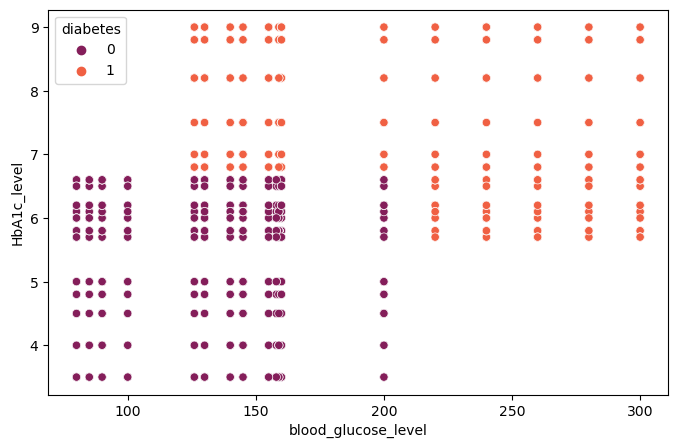

In [59]:
plt.figure(figsize=(8,5))
sns.scatterplot(x = 'blood_glucose_level', y = 'HbA1c_level', data = df, hue='diabetes', palette='rocket')
plt.show()

#### INFERENCE
* Non diabetic patients have blood sugar level <= 200 and hba1c levels <=6.8
* Patients who have hba1c level >=6 despite having low blood sugar levels are at risk of having diabetes
* All patients having blood glucose level > 200 are diabetic and having hba1c levels higher than 6.

#### <i> 3. What is the rate of diabetes in patients by gender ? Visualize using a chart </i>

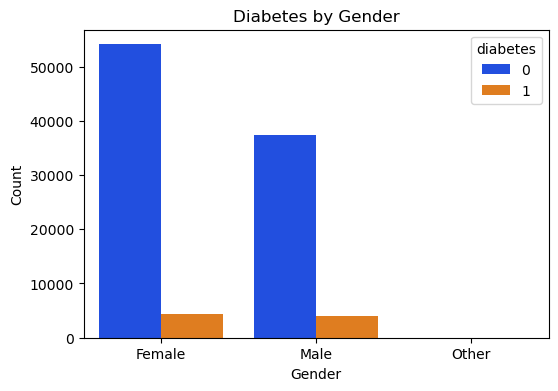

In [14]:
plt.figure(figsize=(6,4))
sns.countplot(x = df['gender'], hue = df['diabetes'], palette='bright')
plt.title('Diabetes by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

#### INFERENCE
* If we take percentage, males are at higher risk of diabetes than females
* Other genders are very small in number so nothing concrete can be said on their situtation

#### <i> 4. What is the rate of diabetes in patients by smoking history ? Visualize using a chart </i>

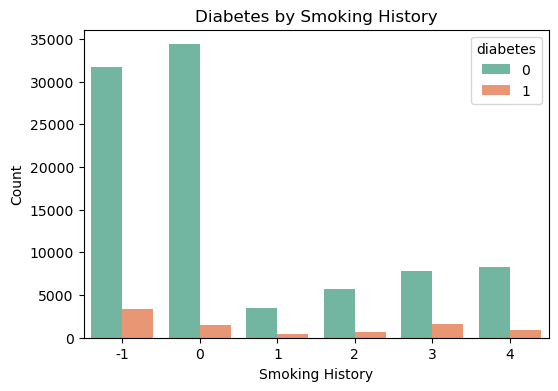

In [57]:
plt.figure(figsize=(6,4))
sns.countplot(x = df['smoking_history'], hue = df['diabetes'], palette='Set2')
plt.title('Diabetes by Smoking History')
plt.xlabel('Smoking History')
plt.ylabel('Count')
plt.show()

In [20]:
x=((df['smoking_history'][df['diabetes'] == 1].value_counts())*100)/(df['smoking_history'].value_counts())
x.sort_values()

No Info         4.059638
never           9.534122
current        10.208917
not current    10.702652
ever           11.788212
former         17.001711
Name: smoking_history, dtype: float64

#### INFERENCE
* Although it seems from the chart that people who have never smoked have highest chance of diabetes but if we go by the percentage, any person who has been currently smoking or has had a history of smoking have higher chance of getting diabetes.

#### <i> 5. What is the rate of diabetes in patients by age ? Visualize using a chart </i>

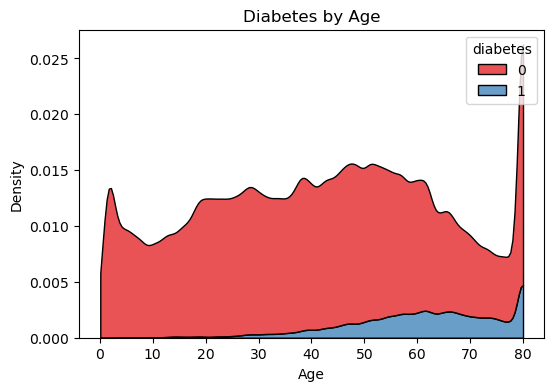

In [54]:
plt.figure(figsize=(6,4))
sns.kdeplot(x = df['age'], hue=df['diabetes'], bw_adjust=.4, multiple="stack", cut=0, palette='Set1')
plt.title('Diabetes by Age')
plt.xlabel('Age')
plt.ylabel('Density')
plt.show()

#### INFERENCE
* From the density plot, it seems that Diabetes can occur in any age but by their 40's, a person has the highest chance of developing it.
* It is much more common at older age than at a younger age

#### <i> 6. What is the ratio of diabetes in among all patients ? Visualize using a chart </i>

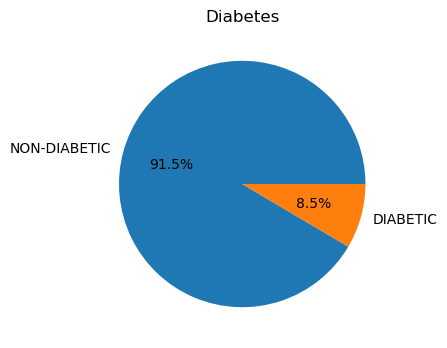

In [52]:
plt.figure(figsize=(6,4))
plt.pie(x = df['diabetes'].value_counts().values, labels=['NON-DIABETIC','DIABETIC'], autopct='%1.1f%%')
plt.title('Diabetes')
plt.show()

#### INFERENCE
* Out of 100K patients, 8.5% or around 8,500 of them are diabetic

#### <i> 7. What is the correlation between all the feature columns of the diabetes dataset ? Visualize in one chart </i>

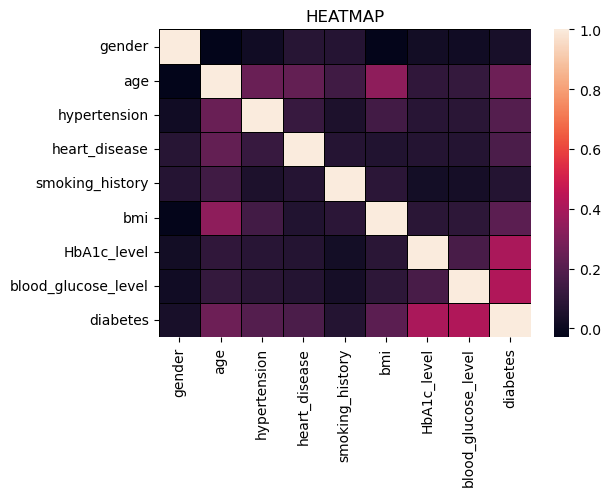

In [47]:
plt.figure(figsize=(6,4))
sns.heatmap(df.corr(numeric_only=True), linewidth = 0.5, linecolor='black')
plt.title("HEATMAP")
plt.show()

### <b> END OF EDA</b>
# <b>BEGINNING WITH ML MODEL FOR CHURN PREDICTION</b>
### 1. DATA PREPOCESSING

* It will include cleaning(if na present) of data as we are only only sklearn, not tensorflow which can  deal with na values automatically
* Converting categorical columns to numerical columns
* Dropping useless columns
* Selecting feature columns for ML model
* Scaling the data 
* Splitting data into train and test datasets
* Oversampling the training data so that the model sees equal diabetes and non-diabetes patients while training

In [3]:
df['smoking_history'].replace(['never', 'No Info', 'current', 'former', 'ever', 'not current'],[-1,0,4,3,1,2],inplace=True)
df['gender'] = (df['gender'] == 'Male').astype(int)

In [4]:
# importing necessary libraries
# here we use only classifier models as we need either 1 or 0 in output and not predict a random number
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
import sklearn

In [5]:
features = df.columns[0:8]
X = df[features]
y = df['diabetes']

scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3)

ros = RandomOverSampler()
X_train,y_train = ros.fit_resample(X_train, y_train)

y_train.value_counts()

0    64033
1    64033
Name: diabetes, dtype: int64

### 2. CREATING DATA PIPELINES FOR DIFFERENT MODELS

#### STEPS:

* Initialising a data pipeline
* Creating a list of scoring methods

In [6]:
pipe = Pipeline([
    ('model', None)
])
score = ['accuracy','precision','recall','f1']

* Creating parameter grids for all models that are going to be used
* Initialising GRIDSEARCHCV with pipeline, parameter grid, scoring methods
* Fitting the grid on training data
* Finding the best model and parameters

#### Reader Warning
* The Model training and tuning the hyperparameters takes a lot of time, so that process is not depicted here.
* Instead, the best hyperparameters are selected through training and then re-fed in to gridsearchcv to further increase accuracy.
* But still, if anyone has the time, he can go through all this again, but remember, we have close to 120k rows after oversampling.

### K-NEAREST NEIGHBORS

In [ ]:
param_grid_knn = [{
    'model': [KNeighborsClassifier()],
    'model__n_neighbors': [9],
    'model__weights': ['uniform'],
    'model__algorithm' : ['ball_tree'],
    'model__leaf_size' : [30]
}]

grid_search_knn = GridSearchCV(pipe, param_grid_knn, scoring = score, cv=20, verbose= 2, refit='accuracy', n_jobs=-1)
grid_search_knn.fit(X_train,y_train)

In [34]:
print("Best Parameters:", grid_search_knn.best_params_)

# Print the best score found during grid search
print("Best Score:", grid_search_knn.best_score_)

pd.DataFrame(grid_search_knn.cv_results_).head()

Best Parameters: {'model': KNeighborsClassifier(algorithm='ball_tree', n_neighbors=9), 'model__algorithm': 'ball_tree', 'model__leaf_size': 30, 'model__n_neighbors': 9, 'model__weights': 'uniform'}
Best Score: 0.9468261834732958


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model,param_model__algorithm,param_model__leaf_size,param_model__n_neighbors,param_model__weights,params,...,split13_test_f1,split14_test_f1,split15_test_f1,split16_test_f1,split17_test_f1,split18_test_f1,split19_test_f1,mean_test_f1,std_test_f1,rank_test_f1
0,1.104151,0.239349,39.654516,4.547751,"KNeighborsClassifier(algorithm='ball_tree', n_...",ball_tree,30,9,uniform,{'model': KNeighborsClassifier(algorithm='ball...,...,0.998044,0.997809,0.997573,0.997652,0.998201,0.998514,0.997966,0.809611,0.172614,1


### LOGISTIC REGRESSION

In [ ]:
param_grid_lr = [{
    'model': [LogisticRegression()],
    'model__penalty': ['l2'],
    'model__C': [5.0],
    'model__solver': ['saga'],
    'model__max_iter': [150]
}]

grid_search_lr = GridSearchCV(pipe, param_grid_lr, scoring = score, cv=20, verbose= 2, refit='accuracy', n_jobs=-1)
grid_search_lr.fit(X_train,y_train)

In [29]:
print("Best Parameters:", grid_search_lr.best_params_)

# Print the best score found during grid search
print("Best Score:", grid_search_lr.best_score_)

pd.DataFrame(grid_search_lr.cv_results_).head()

Best Parameters: {'model': LogisticRegression(C=5.0, max_iter=150, solver='saga'), 'model__C': 5.0, 'model__max_iter': 150, 'model__penalty': 'l2', 'model__solver': 'saga'}
Best Score: 0.875267122307499


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model,param_model__C,param_model__max_iter,param_model__penalty,param_model__solver,params,...,split13_test_f1,split14_test_f1,split15_test_f1,split16_test_f1,split17_test_f1,split18_test_f1,split19_test_f1,mean_test_f1,std_test_f1,rank_test_f1
0,2.031526,0.467255,0.03349,0.02379,"LogisticRegression(C=5.0, max_iter=150, solver...",5.0,150,l2,saga,"{'model': LogisticRegression(C=5.0, max_iter=1...",...,0.930248,0.928816,0.927021,0.92792,0.928906,0.929622,0.935406,0.733204,0.179827,1


### RANDOM FOREST CLASSIFIER

In [ ]:
param_grid_rf = [{
    'model': [RandomForestClassifier()],
    'model__n_estimators': [150],
    'model__criterion': ['gini'],
    'model__max_depth': [None],
    'model__min_samples_split': [2],
    'model__min_samples_leaf': [1],
    'model__max_features': ['sqrt'],
    'model__random_state': [1]
}]

grid_search_rf = GridSearchCV(pipe, param_grid_rf, scoring = score, cv=20, verbose= 2, refit='accuracy', n_jobs=-1)
grid_search_rf.fit(X_train,y_train)

In [27]:
print("Best Parameters:", grid_search_rf.best_params_)

# Print the best score found during grid search
print("Best Score:", grid_search_rf.best_score_)

pd.DataFrame(grid_search_rf.cv_results_).head()

Best Parameters: {'model': RandomForestClassifier(n_estimators=150, random_state=1), 'model__criterion': 'gini', 'model__max_depth': None, 'model__max_features': 'sqrt', 'model__min_samples_leaf': 1, 'model__min_samples_split': 2, 'model__n_estimators': 150, 'model__random_state': 1}
Best Score: 0.9935270219017223


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model,param_model__criterion,param_model__max_depth,param_model__max_features,param_model__min_samples_leaf,param_model__min_samples_split,...,split13_test_f1,split14_test_f1,split15_test_f1,split16_test_f1,split17_test_f1,split18_test_f1,split19_test_f1,mean_test_f1,std_test_f1,rank_test_f1
0,71.118481,15.66956,0.569397,0.177161,"RandomForestClassifier(n_estimators=150, rando...",gini,None,sqrt,1,2,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.965704,0.032052,1


### DECISION TREE CLASSIFIER

In [ ]:
param_grid_dt = [{
    'model': [DecisionTreeClassifier()],
    'model__max_depth': [None],
    'model__min_samples_split': [2],
    'model__min_samples_leaf': [1],
    'model__criterion': ['gini']
}]

grid_search_dt = GridSearchCV(pipe, param_grid_dt, scoring = score, cv=30, verbose= 2, refit='accuracy', n_jobs=-1)
grid_search_dt.fit(X_train,y_train)

In [21]:
print("Best Parameters:", grid_search_dt.best_params_)

# Print the best score found during grid search
print("Best Score:", grid_search_dt.best_score_)

pd.DataFrame(grid_search_dt.cv_results_).head()

Best Parameters: {'model': DecisionTreeClassifier(), 'model__criterion': 'gini', 'model__max_depth': None, 'model__min_samples_leaf': 1, 'model__min_samples_split': 2}
Best Score: 0.9864761458577341


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model,param_model__criterion,param_model__max_depth,param_model__min_samples_leaf,param_model__min_samples_split,params,...,split23_test_f1,split24_test_f1,split25_test_f1,split26_test_f1,split27_test_f1,split28_test_f1,split29_test_f1,mean_test_f1,std_test_f1,rank_test_f1
0,1.201911,0.340921,0.028137,0.013771,DecisionTreeClassifier(),gini,None,1,2,"{'model': DecisionTreeClassifier(), 'model__cr...",...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.931914,0.063867,1


### GAUSSIAN NAIVE BAYES

In [ ]:
param_grid_nb = [{
    'model': [GaussianNB()]
}]

grid_search_nb = GridSearchCV(pipe, param_grid_nb, scoring = score, cv=5, verbose= 2, refit='accuracy', n_jobs=-1)
grid_search_nb.fit(X_train,y_train)

In [14]:
print("Best Parameters:", grid_search_nb.best_params_)

# Print the best score found during grid search
print("Best Score:", grid_search_nb.best_score_)

pd.DataFrame(grid_search_nb.cv_results_).head()

Best Parameters: {'model': GaussianNB()}
Best Score: 0.8230673420027946


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model,params,split0_test_accuracy,split1_test_accuracy,split2_test_accuracy,split3_test_accuracy,...,std_test_recall,rank_test_recall,split0_test_f1,split1_test_f1,split2_test_f1,split3_test_f1,split4_test_f1,mean_test_f1,std_test_f1,rank_test_f1
0,0.118259,0.003771,0.049943,0.002182,GaussianNB(),{'model': GaussianNB()},0.880846,0.88049,0.862492,0.743763,...,0.023996,1,0.535323,0.533313,0.79088,0.853055,0.855668,0.713648,0.148249,1


### SUPPORT VECTOR CLASSIFIER

In [ ]:
param_grid_svm = [{
    'model': [SVC()]
}]

grid_search_svm = GridSearchCV(pipe, param_grid_svm, scoring = score, cv=5, verbose= 2, refit='accuracy')
grid_search_svm.fit(X_train,y_train)

In [43]:
print("Best Parameters:", grid_search_svm.best_params_)

# Print the best score found during grid search
print("Best Score:", grid_search_svm.best_score_)

pd.DataFrame(grid_search_svm.cv_results_).head()

Best Parameters: {'model': SVC()}
Best Score: 0.8565114937902836


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model,params,split0_test_accuracy,split1_test_accuracy,split2_test_accuracy,split3_test_accuracy,...,std_test_recall,rank_test_recall,split0_test_f1,split1_test_f1,split2_test_f1,split3_test_f1,split4_test_f1,mean_test_f1,std_test_f1,rank_test_f1
0,179.287804,16.539995,63.504735,1.328299,SVC(),{'model': SVC()},0.855548,0.847343,0.890173,0.843946,...,0.050102,1,0.532592,0.516448,0.848118,0.91537,0.916311,0.745768,0.182404,1


## Predicting on the testing data using the best model

In [45]:
grid_search = {
    "KNN CLASSIFIER": grid_search_knn,
    "Logistic Regression": grid_search_lr,
    "Naive Bayes": grid_search_nb, 
    "Random Forest Classifier": grid_search_rf,
    "Decision Trees": grid_search_dt,
    "SVM": grid_search_svm
}

In [46]:
print("ACCURACY OF DIFFERENT MODELS")
print(('-')*30)
for grid_name, grid_type in grid_search.items():
    y_predict = grid_type.predict(X_test)
    print(f"{grid_name} : {accuracy_score(y_test, y_predict)*100} %")
print(('-')*30)

ACCURACY OF DIFFERENT MODELS
------------------------------
KNN CLASSIFIER : 89.82 %
Logistic Regression : 88.5 %
Naive Bayes : 88.71 %
Random Forest Classifier : 96.63000000000001 %
Decision Trees : 95.47333333333333 %
SVM : 88.8 %
------------------------------


### We have successfully trained a model using Random Forest Classifier which has an accuracy of 96.63 % for predicting diabetes.